In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Anxiety2_modified.csv')
data.head()

,1. Age,3. University,4. Department,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?","4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?","5. In a semester, how often have you worried too much about academic affairs?",...,"7. In a semester, how often have you felt afraid, as if something awful might happen?",Anxiety Level\n04: minimal anxiety\n59: mild anxiety\n1014: moderate anxiety\n1521: severe anxiety,2. Gender_Female,2. Gender_Male,2. Gender_Prefer not to say,5. Academic Year_First Year or Equivalent,5. Academic Year_Fourth Year or Equivalent,5. Academic Year_Other,5. Academic Year_Second Year or Equivalent,5. Academic Year_Third Year or Equivalent
0,1,8,2,1,0,1,1,1,2,2,...,1,2,1,0,0,0,1,0,0,0
1,1,8,2,4,0,2,2,1,1,1,...,1,1,0,1,0,1,0,0,0,0
2,1,8,2,2,0,2,1,1,0,2,...,2,2,0,1,0,1,0,0,0,0
3,1,8,2,3,0,2,1,1,1,1,...,1,1,0,1,0,1,0,0,0,0
4,1,8,2,3,0,1,1,1,1,1,...,1,1,0,1,0,1,0,0,0,0


In [3]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("/content/drive/MyDrive/bangladesh_student/Anxiety2_modified.csv")

# Drop the 'Abundance' column from the DataFrame to create the feature matrix X
X = data.drop('Anxiety Level\n04: minimal anxiety\n59: mild anxiety\n1014: moderate anxiety\n1521: severe anxiety', axis=1)

# Extract the 'Abundance' column as the target variable y
y = data['Anxiety Level\n04: minimal anxiety\n59: mild anxiety\n1014: moderate anxiety\n1521: severe anxiety']

# Print the feature matrix X and target variable y
print(X)
print(y)


      1. Age  3. University  4. Department  6. Current CGPA  \
0          1              8              2                1   
1          1              8              2                4   
2          1              8              2                2   
3          1              8              2                3   
4          1              8              2                3   
...      ...            ...            ...              ...   
1972       2              2              0                3   
1973       2              2             10                3   
1974       2              2              0                4   
1975       2              2             10                2   
1976       2              8              2                1   

      7. Did you receive a waiver or scholarship at your university?  \
0                                                     0                
1                                                     0                
2                          

In [4]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Accuracy: 0.9949494949494949
Weighted Precision: 0.995049504950495
Micro Precision: 0.9949494949494949
Macro Precision: 0.995049504950495
Precision per class: [1.         0.98019802 1.         1.        ]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.98      1.00      0.99        99
           2       1.00      1.00      1.00       122
           3       1.00      1.00      1.00       150

    accuracy                           0.99       396
   macro avg       1.00      0.98      0.99       396
weighted avg       1.00      0.99      0.99       396



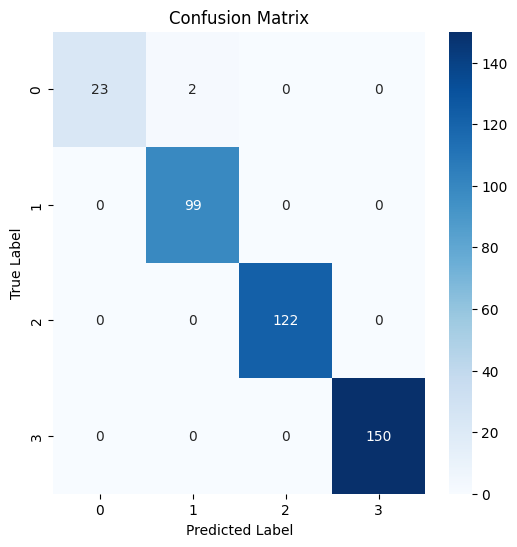

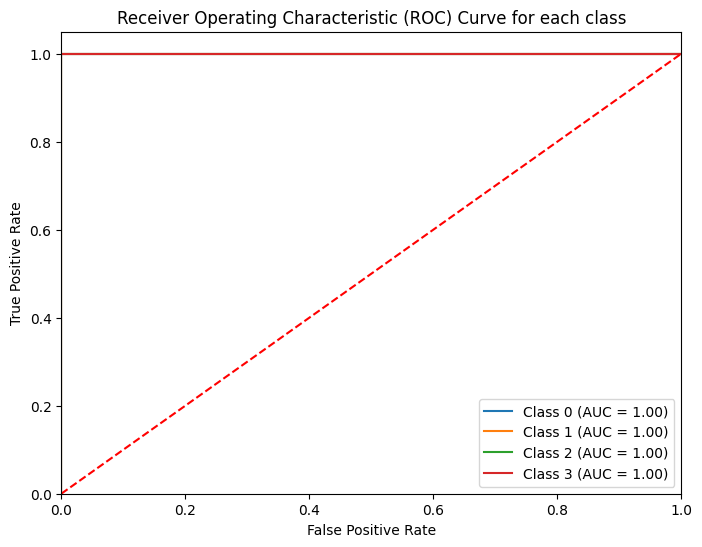

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



# Initialize the logistic regression classifier
logistic_classifier = LogisticRegression(max_iter=1000, C=0.3)

# Define the custom equation coefficients
beta_a0 = -2.0  # Intercept
beta_a1 = 0.5   # Coefficient for the feature X

# Train the model
logistic_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = logistic_classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming your classes are encoded as integers starting from 0
classes = np.unique(y_test)

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


In [6]:
!pip install shapash

In [7]:
from shapash.explainer.smart_explainer import SmartExplainer

# Initialize SHAPASH explainer with the logistic regression classifier
xpl = SmartExplainer(model=logistic_classifier)

# Predict on test data
y_pred = logistic_classifier.predict(X_test)

# Convert y_pred to a pandas Series with the same index as X_test
y_pred_series = pd.Series(y_pred, index=X_test.index)

# Compile the explainer with test data and predicted values
xpl.compile(x=X_test, y_pred=y_pred_series)

# Plot feature importance
xpl.plot.features_importance()


INFO: Shap explainer type - shap.explainers.PermutationExplainer()


PermutationExplainer explainer: 397it [00:36, 10.99it/s]                         


In [8]:
print("Indices in your dataset:", X_test.index)


Indices in your dataset: Index([1827, 1889,  678,  351, 1105,  610,   70, 1125,   56, 1952,
       ...
       1681,  570,  966, 1686, 1588,   71,  764,  259,   51,  198],
      dtype='int64', length=396)


In [9]:
from shapash.explainer.smart_explainer import SmartExplainer

# Initialize SHAPASH explainer with the logistic regression classifier
xpl = SmartExplainer(model=logistic_classifier)

# Predict on test data
y_pred = logistic_classifier.predict(X_test)

# Convert y_pred to a pandas Series with the same index as X_test
y_pred_series = pd.Series(y_pred, index=X_test.index)

# Compile the explainer with test data and predicted values
xpl.compile(x=X_test, y_pred=y_pred_series)

# Generate the comparison plot for a specific index (1827 in this case)
index_to_visualize = 1827
xpl.plot.compare_plot(index=[index_to_visualize])


INFO: Shap explainer type - shap.explainers.PermutationExplainer()


PermutationExplainer explainer: 397it [00:19, 11.61it/s]                         
/usr/local/lib/python3.10/dist-packages/shapash/explainer/smart_plotter.py:1551: UserWarning:

Comparison needs at least 2 individuals



In [10]:
from shapash.explainer.smart_explainer import SmartExplainer

# Initialize SHAPASH explainer with the logistic regression classifier
xpl = SmartExplainer(model=logistic_classifier)

# Predict on test data
y_pred = logistic_classifier.predict(X_test)

# Convert y_pred to a pandas Series with the same index as X_test
y_pred_series = pd.Series(y_pred, index=X_test.index)

# Compile the explainer with test data and predicted values
xpl.compile(x=X_test, y_pred=y_pred_series)

# Generate the comparison plot for specific indices
indices_to_visualize = [1827, 1588, 71, 764, 259]
xpl.plot.compare_plot(index=indices_to_visualize)


INFO: Shap explainer type - shap.explainers.PermutationExplainer()


PermutationExplainer explainer: 397it [00:31,  7.92it/s]                         


In [11]:
# Generate individual SHAP contribution plot for a specific index
index_to_visualize = 1827
xpl.plot.local_plot(index=index_to_visualize)


In [12]:
# Generate individual SHAP contribution plot for a specific index
index_to_visualize = 259
xpl.plot.local_plot(index=index_to_visualize)
